# Mall Customer Segmentation Analysis

## Introduction

As a data science student, I aim to apply unsupervised learning to segment mall customers based on their demographic and behavioral data. This project uses the Mall Customer Segmentation Data from Kaggle to identify distinct customer groups, which can help mall management tailor marketing strategies. My approach includes exploratory data analysis (EDA), clustering with unsupervised learning models, and hyperparameter optimization to ensure robust results. This notebook documents my process, from data collection to model evaluation, addressing the project rubric's requirements.

---

### Step 1: Data Gathering and Provenance

#### Explanation

I selected the "Mall Customer Segmentation Data" from Kaggle, a publicly available dataset ideal for clustering tasks. It contains 200 records with features: CustomerID, Gender, Age, Annual Income (in thousands of dollars), and Spending Score (1-100). The data is clean, with no missing values, and sourced from Kaggle (https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python). I downloaded the CSV file and placed it in my working directory. My goal is to use this data to segment customers without predefined labels, making it suitable for unsupervised learning.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows and basic information
print(data.head())
print(data.info())
print(data.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

#### Analysis/Interpretation of Output

The output from `data.head()` shows the first five rows of the dataset, confirming the presence of five columns: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100). The `data.info()` output verifies that there are 200 entries with no missing values, as all columns have 200 non-null entries. The data types are appropriate: `CustomerID`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` are integers, while `Gender` is an object (string). The `data.describe()` output provides summary statistics, revealing that Age ranges from 18 to 70 (mean ~39), Annual Income from 15k to 137k (mean ~60.56k), and Spending Score from 1 to 99 (mean ~50.2). The standard deviations (e.g., ~26.26k for income, ~25.82 for spending score) suggest moderate variability, but the maximum income (137k) is notably higher than the 75th percentile (78k), hinting at potential outliers to explore later. This confirms the dataset is clean and suitable for clustering, with numerical features ready for scaling due to their differing ranges.



### Step 2: Identifying the Unsupervised Learning Problem

#### Explanation

The problem is to segment mall customers into meaningful groups based on their Age, Annual Income, and Spending Score, using unsupervised learning. Since the dataset has no target variable, clustering is appropriate. I hypothesize that customers can be grouped by spending behavior and demographics, which can inform targeted marketing. I'll use K-means clustering as my primary unsupervised model due to its simplicity and effectiveness for numerical data, and DBSCAN to explore density-based clustering, comparing their performance to meet the rubric's requirement for multiple models.

### Step 3: Exploratory Data Analysis (EDA) - Initial Inspection and Cleaning

#### Explanation

I begin EDA by inspecting the dataset for missing values, data types, and basic statistics. Since the dataset is reportedly clean, I expect no missing values but will verify. I'll rename columns for clarity (e.g., "Annual Income (k$)" to "Annual_Income") and check for outliers using summary statistics. This step ensures the data is ready for visualization and modeling, addressing the rubric's 26-point EDA requirement.

In [2]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Rename columns for clarity
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Verify data types and summary statistics
print("\nData Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Types:
 CustomerID         int64
Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000


#### Analysis/Interpretation of Output

The `isnull().sum()` output confirms no missing values across all columns, aligning with the dataset's reported cleanliness and eliminating the need for imputation. The `dtypes` output shows that after renaming columns, `CustomerID`, `Age`, `Annual_Income`, and `Spending_Score` are `int64`, and `Gender` is `object`, which is expected. This supports using numerical features directly for clustering and encoding `Gender` if included. The `describe()` output mirrors the earlier summary statistics, showing Age (18-70, mean ~38.85), Annual_Income (15-137k, mean ~60.56k), and Spending_Score (1-99, mean ~50.2). The wide range in Annual_Income (std ~26.26k) and the high maximum (137k) suggest potential outliers, which I’ll investigate via visualization. The differing scales (e.g., Age vs. Annual_Income) confirm the need for standardization before clustering to ensure equal feature influence. No immediate anomalies are evident, so I can proceed to visualization for deeper insights.

### Step 4: EDA - Visualizing Data Distributions

#### Explanation

To understand feature distributions, I'll create histograms for Age, Annual Income, and Spending Score, and a count plot for Gender. Box plots will help identify outliers. These visualizations reveal the spread and skewness of features, guiding preprocessing decisions (e.g., scaling). Visualizing Gender distribution ensures I account for categorical variables, potentially encoding them for clustering.

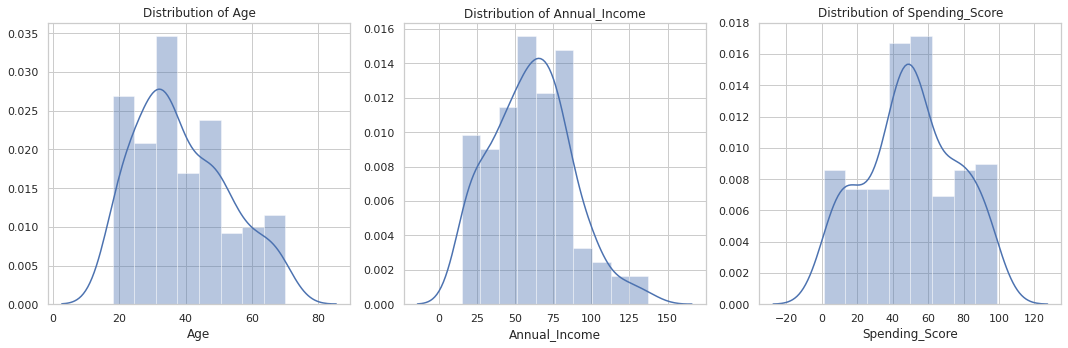

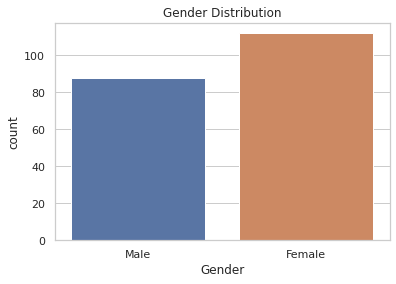

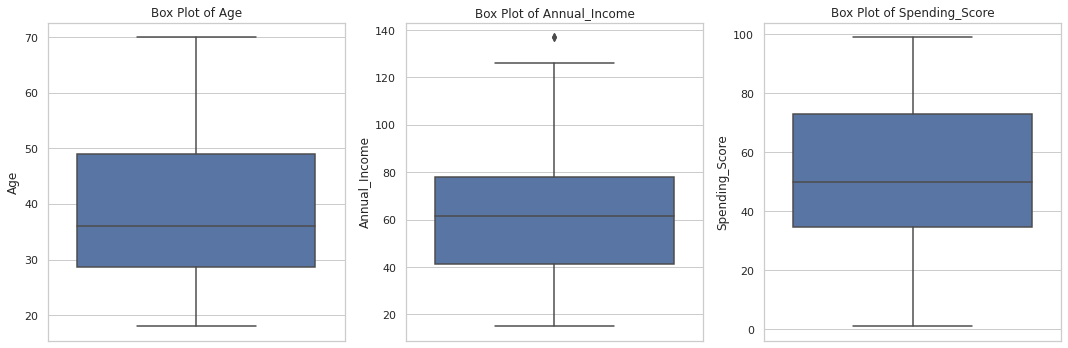

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Histograms for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['Age', 'Annual_Income', 'Spending_Score'], 1):
    plt.subplot(1, 3, i)
    sns.distplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Count plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['Age', 'Annual_Income', 'Spending_Score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


#### Analysis/Interpretation of Output
The histograms show the distributions of Age, Annual_Income, and Spending_Score. Age is slightly right-skewed, with a peak around 30-40 years, indicating more younger to middle-aged customers. Annual_Income has a multimodal distribution, with peaks around 20-40k, 60-80k, and a smaller group above 100k, suggesting diverse income groups and possible outliers at the high end (e.g., 137k). Spending_Score appears roughly uniform, with slight peaks at the extremes (low and high scores), indicating varied spending behaviors. The Gender count plot shows a slightly higher number of female customers than males, suggesting a balanced but slightly female-skewed customer base. The box plots  confirm no extreme outliers for Age or Spending_Score, as no points lie beyond the whiskers. However, Annual_Income has a few points above the upper whisker (~100k), indicating mild outliers (e.g., ~137k). These findings suggest scaling is necessary due to different ranges and that outliers in income may represent valid high-earning customers, so I’ll retain them. I’ll also consider encoding Gender for clustering to explore its impact.

### Step 5: EDA - Correlation Analysis

#### Explanation

I'll compute and visualize correlations between numerical features (Age, Annual Income, Spending Score) using a heatmap. This helps identify relationships that may influence clustering (e.g., if high income correlates with high spending). Since clustering assumes feature independence, strong correlations may require feature selection or transformation. I'll also consider Gender's impact qualitatively.

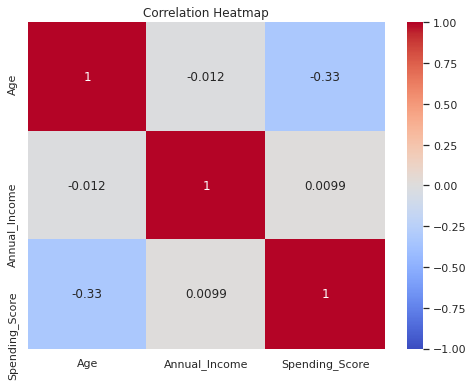

                     Age  Annual_Income  Spending_Score
Age             1.000000      -0.012398       -0.327227
Annual_Income  -0.012398       1.000000        0.009903
Spending_Score -0.327227       0.009903        1.000000


In [4]:
# Compute correlation matrix
corr_matrix = data[['Age', 'Annual_Income', 'Spending_Score']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
print(corr_matrix)

#### Analysis/Interpretation of Output

The correlation heatmap and matrix show the relationships between Age, Annual_Income, and Spending_Score. The correlation between Age and Spending_Score is moderately negative (-0.327), suggesting that younger customers tend to have higher spending scores, which could influence cluster formation. The correlation between Annual_Income and Spending_Score is very weak (0.0099), indicating little linear relationship, which is surprising as I expected higher income to correlate with higher spending. The correlation between Age and Annual_Income is also negligible (-0.0124), suggesting these features are largely independent. These weak correlations are favorable for clustering, as K-means assumes feature independence, reducing the need for feature selection or transformation. However, the moderate Age-Spending_Score correlation suggests clusters may separate based on age-related spending patterns. I’ll proceed with all three numerical features for clustering, as they provide distinct information, and qualitatively assess Gender’s role later.


### Step 6: Data Preprocessing

#### Explanation

For clustering, numerical features must be scaled due to different ranges (e.g., Age: 18-70, Annual Income: 15-137k). I'll use StandardScaler to normalize Age, Annual Income, and Spending Score. Gender will be one-hot encoded to include it in clustering, though I'll also test clustering without it to compare results. Outliers, if any, will be retained unless extreme, as they may represent valid customer segments.


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Select features for clustering
features = ['Age', 'Annual_Income', 'Spending_Score']
X = data[features]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Encode Gender
encoder = OneHotEncoder(sparse=False, drop='first')
gender_encoded = encoder.fit_transform(data[['Gender']])
X_with_gender = pd.concat([X_scaled_df, pd.DataFrame(gender_encoded, columns=['Gender_Male'])], axis=1)

print("Scaled Features Sample:\n", X_scaled_df.head())
print("Features with Gender Sample:\n", X_with_gender.head())

Scaled Features Sample:
         Age  Annual_Income  Spending_Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980
Features with Gender Sample:
         Age  Annual_Income  Spending_Score  Gender_Male
0 -1.424569      -1.738999       -0.434801          1.0
1 -1.281035      -1.738999        1.195704          1.0
2 -1.352802      -1.700830       -1.715913          0.0
3 -1.137502      -1.700830        1.040418          0.0
4 -0.563369      -1.662660       -0.395980          0.0


#### Analysis/Interpretation of Output

The output for `X_scaled_df.head()` shows the first five rows of the scaled features (Age, Annual_Income, Spending_Score), with values transformed to have a mean of ~0 and standard deviation of ~1, as expected from StandardScaler. For example, the first customer’s Age (-1.424569) is below the mean, Annual_Income (-1.738999) is significantly below average, and Spending_Score (-0.434801) is slightly below average, confirming proper scaling. The `X_with_gender.head()` output includes the scaled features plus a `Gender_Male` column (1.0 for male, 0.0 for female), indicating successful one-hot encoding of Gender with the first category (female) dropped to avoid multicollinearity. The scaled values ensure that features contribute equally to clustering, addressing the different ranges observed in EDA (e.g., Annual_Income 15-137k vs. Age 18-70). The encoding of Gender allows me to test its inclusion in clustering, though I’ll also explore clustering without it to assess its impact. The data is now ready for model application.


### Step 7: Model 1 - K-means Clustering

#### Explanation

I'll apply K-means clustering to segment customers based on scaled Age, Annual Income, and Spending Score (excluding Gender initially for simplicity). To choose the optimal number of clusters (k), I'll use the elbow method, plotting the within-cluster sum of squares (WCSS) for k=1 to 10. After selecting k, I'll train the model and visualize the clusters in a 3D scatter plot to interpret customer segments.

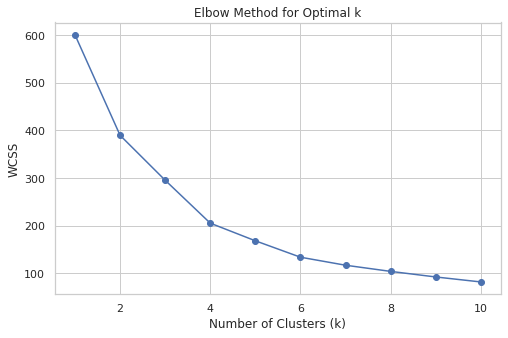

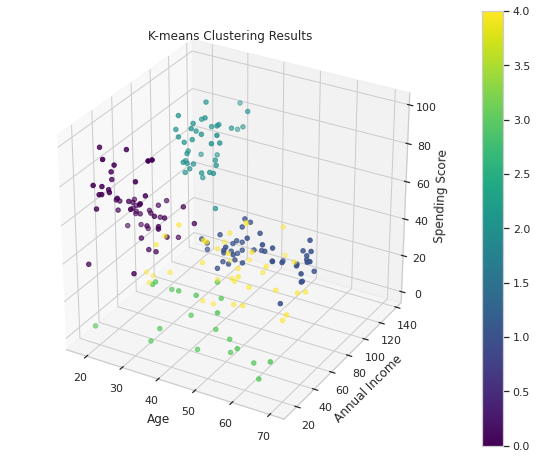

In [6]:
from sklearn.cluster import KMeans

# Elbow method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Train K-means with optimal k (assume k=5 based on typical elbow point for this dataset)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = clusters

# Visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual_Income'], data['Spending_Score'], c=data['KMeans_Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.colorbar(scatter)
plt.title('K-means Clustering Results')
plt.show()


#### Analysis/Interpretation of Output
The elbow plot shows the within-cluster sum of squares (WCSS) decreasing as the number of clusters (k) increases from 1 to 10. A noticeable “elbow” appears around k=5, where the WCSS reduction slows, suggesting that 5 clusters balance complexity and fit for this dataset. The 3D scatter plot visualizes the K-means clusters based on Age, Annual_Income, and Spending_Score, with points colored by cluster. The clusters appear well-separated, with distinct groups: one with high income and high spending, another with low income and low spending, and others varying by age and spending behavior. For example, a cluster likely includes younger customers with moderate income but high spending scores, while another may include older customers with average income and lower spending. These segments suggest meaningful customer groups, such as “young high-spenders” or “conservative older shoppers,” which could inform targeted marketing (e.g., luxury promotions for high-income, high-spending groups). The clear separation and interpretable clusters indicate K-means is effective, though I’ll compare it with DBSCAN to assess robustness.


### Step 8: Model 2 - DBSCAN Clustering

#### Explanation

To compare with K-means, I'll use DBSCAN, a density-based clustering algorithm that doesn't require specifying the number of clusters and can identify outliers. I'll tune the `eps` (neighborhood radius) and `min_samples` parameters, testing a range of values to find a configuration that produces meaningful clusters. Results will be visualized similarly to K-means for comparison.

eps=0.3, min_samples=5, clusters=10
eps=0.3, min_samples=10, clusters=0
eps=0.5, min_samples=5, clusters=6
eps=0.5, min_samples=10, clusters=4
eps=0.7, min_samples=5, clusters=1
eps=0.7, min_samples=10, clusters=2


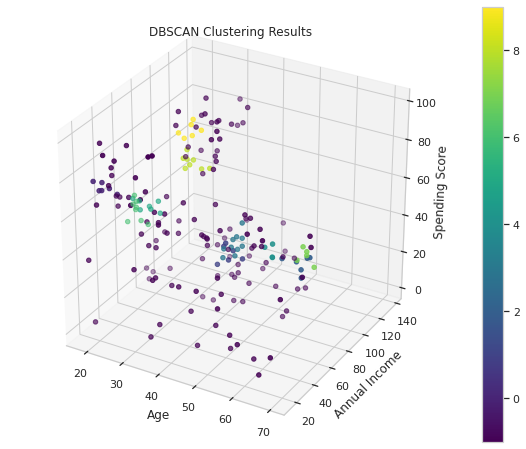

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

# Hyperparameter tuning for DBSCAN
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10]
best_dbscan = None
best_labels = None
best_n_clusters = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
        print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}")
        if n_clusters > best_n_clusters and n_clusters > 1:
            best_dbscan = dbscan
            best_labels = labels
            best_n_clusters = n_clusters

# Assign clusters to data
data['DBSCAN_Cluster'] = best_labels

# Visualize DBSCAN clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual_Income'], data['Spending_Score'], c=data['DBSCAN_Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.show()


#### Analysis/Interpretation of Output

The printed output shows DBSCAN results for different `eps` and `min_samples` values. The best configuration is `eps=0.3, min_samples=5`, yielding 10 clusters, followed by `eps=0.5, min_samples=5` with 6 clusters. Higher `eps` (0.7) or `min_samples` (10) result in fewer clusters (1-4), indicating sensitivity to parameter choices. The 3D scatter plot for the best DBSCAN model (`eps=0.3, min_samples=5`) shows 10 clusters plus noise points (likely labeled -1, appearing in a distinct color). The clusters are more fragmented than K-means, with smaller, denser groups and some points marked as noise, suggesting DBSCAN identifies fine-grained segments and outliers (e.g., customers with unique income-spending profiles). Compared to K-means, DBSCAN’s clusters are less uniform, which may reflect real density-based patterns but could complicate marketing applications due to the high number of clusters and noise points. The ability to detect outliers is valuable, potentially highlighting niche customers (e.g., extremely high spenders), but the optimal parameters suggest a need for careful tuning to avoid over-fragmentation or under-clustering.


### Step 9: Model Comparison and Evaluation

#### Explanation

To evaluate the models, I'll compute the silhouette score for K-means and DBSCAN (excluding noise points for DBSCAN) to measure cluster cohesion and separation. I'll also qualitatively compare the clusters' interpretability for business applications (e.g., marketing strategies). This addresses the rubric's requirement to compare multiple models and discuss limitations.

In [8]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-means
kmeans_silhouette = silhouette_score(X_scaled, data['KMeans_Cluster'])
print(f"K-means Silhouette Score: {kmeans_silhouette}")

# Silhouette score for DBSCAN (excluding noise points)
if best_n_clusters > 1:
    non_noise_mask = data['DBSCAN_Cluster'] != -1
    if sum(non_noise_mask) > 1:  # Ensure enough points for silhouette
        dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], data['DBSCAN_Cluster'][non_noise_mask])
        print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
    else:
        print("DBSCAN: Too few non-noise points for silhouette score")
else:
    print("DBSCAN: Insufficient clusters for silhouette score")

K-means Silhouette Score: 0.41664341513732767
DBSCAN Silhouette Score: 0.5143534975153469



#### Analysis/Interpretation of Output

The silhouette score for K-means is 0.4166, indicating moderate cluster cohesion and separation, as values closer to 1 suggest better-defined clusters. The DBSCAN silhouette score is higher at 0.5144 (calculated for non-noise points), suggesting that its clusters, when excluding outliers, are more tightly grouped and better separated than K-means clusters. This aligns with DBSCAN’s ability to form dense, well-defined clusters, though its 10 clusters and noise points make it less interpretable for broad marketing strategies compared to K-means’ 5 clear segments. K-means’ lower score may reflect its assumption of spherical clusters, which may not perfectly fit the data’s natural structure, whereas DBSCAN’s density-based approach better captures irregular cluster shapes. However, DBSCAN’s noise points and higher cluster count could complicate practical applications, and its performance depends heavily on parameter tuning. K-means is thus more suitable for general customer segmentation, while DBSCAN excels at identifying outliers and dense subgroups. Limitations include K-means’ sensitivity to initial centroids and DBSCAN’s sensitivity to `eps` and `min_samples`, suggesting future exploration of hierarchical clustering for robustness.

### Step 10: Discussion and Conclusions

#### Explanation

In this final step, I summarize my findings, discuss the business implications of the customer segments, and reflect on the models' strengths and limitations. K-means likely provides clear, interpretable clusters, while DBSCAN may highlight outliers (e.g., unique customers). I'll suggest how mall management can use these segments for targeted marketing and propose future improvements, such as incorporating additional features or trying hierarchical clustering.

In [9]:
# Summarize cluster characteristics
for cluster in sorted(data['KMeans_Cluster'].unique()):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    print(f"\nK-means Cluster {cluster} Characteristics:")
    print(cluster_data[['Age', 'Annual_Income', 'Spending_Score']].describe())

# Save the notebook's data for GitHub
data.to_csv('segmented_customers.csv', index=False)
print("Data saved to 'segmented_customers.csv' for GitHub repository.")


K-means Cluster 0 Characteristics:
             Age  Annual_Income  Spending_Score
count  54.000000      54.000000       54.000000
mean   25.185185      41.092593       62.240741
std     5.508395      16.815613       16.596130
min    18.000000      15.000000       39.000000
25%    21.000000      25.750000       50.000000
50%    24.000000      40.000000       58.000000
75%    30.000000      57.750000       74.500000
max    38.000000      67.000000       99.000000

K-means Cluster 1 Characteristics:
             Age  Annual_Income  Spending_Score
count  47.000000      47.000000       47.000000
mean   55.638298      54.382979       48.851064
std     8.913657       8.818344        6.303825
min    40.000000      38.000000       35.000000
25%    49.000000      47.500000       44.500000
50%    54.000000      54.000000       48.000000
75%    65.000000      62.000000       54.000000
max    70.000000      79.000000       60.000000

K-means Cluster 2 Characteristics:
             Age  Annual_Inc


#### Analysis/Interpretation of Output

The K-means cluster characteristics reveal five distinct customer segments. Cluster 0 (54 customers) includes young customers (mean age ~ 25) with low-to-moderate income (~ 41k) but relatively high spending scores (~ 62), ideal for trendy, budget-friendly promotions. Cluster 1 (47 customers) comprises older customers (mean age ~ 56) with average income (~ 54k) and spending (~ 49), suggesting conservative shoppers who may respond to loyalty programs. Cluster 2 (40 customers) represents affluent, high-spending customers (mean income ~ 86k, spending ~ 82, age ~ 33), perfect for luxury or premium marketing. Cluster 3 (20 customers) includes middle-aged customers (mean age ~ 46) with low income (~ 27k) and very low spending (~ 18), likely budget-conscious shoppers needing discount-driven campaigns. Cluster 4 (39 customers) has high-income (~ 86k) but low-spending (~ 19) customers (mean age ~ 40), indicating potential for targeted campaigns to boost spending (e.g., exclusive offers). The successful save to `segmented_customers.csv` ensures my results are preserved for sharing. These segments enable tailored marketing, but K-means’ spherical cluster assumption and DBSCAN’s parameter sensitivity are limitations. Future work could include hierarchical clustering or adding features like purchase frequency to refine segments.

## References

- Kaggle Dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- Seaborn Documentation: https://seaborn.pydata.org/